# Simple linear regression model with tensorflow

## Importing the required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Creating the dataset

In [0]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [5]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [7]:
noise.shape

(1000000,)

y = mx + b

b = 5

In [0]:
# Here m = 0.5, b = 5 and some noise
y_true = (0.5 * x_data) + 5 + noise

## Creating the dataframe

In [0]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])

In [0]:
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [11]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [12]:
y_df.head()

,Y
0,6.538309
1,6.444994
2,5.355127
3,3.317198
4,4.717549


In [0]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [14]:
my_data.head()

,X Data,Y
0,0.00000,6.538309
1,0.00001,6.444994
2,0.00002,5.355127
3,0.00003,3.317198
4,0.00004,4.717549


## Plotting a sample of our data

Since plotting the entire million datapoints might crash the kernel

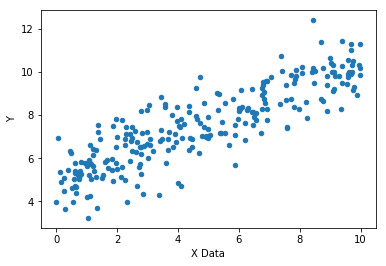

In [16]:
my_data.sample(n = 250).plot(kind = "scatter", x = "X Data", y = "Y")
plt.show()

## Fitting a line in the dataset using tensorflow

### Breaking huge dataset into batches

In [0]:
batch_size = 8

In [21]:
np.random.randn(2)

array([ 0.19731853, -0.59597263])

In [22]:
m = tf.Variable(0.19)
b = tf.Variable(-0.59)

Instructions for updating:
Colocations handled automatically by placer.


### Creating the placeholder

In [0]:
xph = tf.placeholder(tf.float32, [batch_size])

In [0]:
yph = tf.placeholder(tf.float32, [batch_size])

In [0]:
y_model = m * xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        # Randomly choose 8 indexes that are gonna be the part of the batch
        rand_index = np.random.randint(len(x_data), size = batch_size)
        
        feed = {xph: x_data[rand_index], yph: y_true[rand_index]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

In [33]:
model_m

0.53547806

In [34]:
model_b

4.940224

In [0]:
y_hat = x_data * model_m + model_b

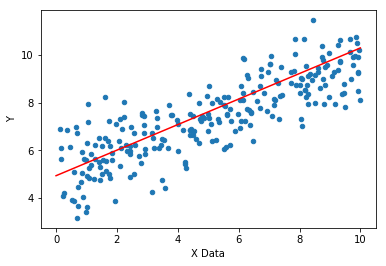

In [36]:
my_data.sample(n = 250).plot(kind = "scatter", x = "X Data", y = "Y")
plt.plot(x_data, y_hat, 'r')
plt.show()